In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

"""
1. 지시 사항과 동일한 타원형 분포의 데이터를
   생성합니다.
   
   Step01. 타원형 분포의 데이터를 생성합니다.
           
           데이터의 개수는 300개,
           데이터 변수의 개수는 2개,
           군집의 개수는 3개,
           데이터의 표준편차는 0.8,
           random_state 는 0으로 설정합니다.
"""
# make_blobs()으로 데이터를 생성해보세요.
X, y = make_blobs(n_samples = 300, n_features=2, centers = 3, cluster_std= 0.8, random_state= 0)

# 데이터의 분포를 변형시키기 위해 transformation을 진행합니다.
transformation = [[0.60834549, -0.63667341],[-0.40887718,0.85253229]]
X_aniso = np.dot(X, transformation)

# 데이터 프레임 만들기 
clusterDF = pd.DataFrame(data = X_aniso, columns= ['ftr1','ftr2'])
clusterDF['target'] = y
target_list = np.unique(y)

# 생성된 데이터 시각화
def data_visualize():
    fig, ax = plt.subplots()
    plt.title('data')
    
    for target in target_list:
        target_cluster = clusterDF[clusterDF['target'] == target]
        ax.scatter(x = target_cluster['ftr1'], y = target_cluster['ftr2'])
    

In [9]:
"""
2. K-Means 클러스터링을 수행하여
   클러스터링 결과를 데이터 프레임 내에 
   저장하는 함수를 완성합니다.
   
   Step01. 데이터 X_aniso에 대한 K-Means 
           클러스터링을 수행합니다.
           
           초기화 방식은 랜덤,
           군집의 개수는 3개, 
           random_state는 0으로 설정합니다.
           
    Step02. kmeans_label 변수에
            클러스터링 결과를 저장합니다.
"""
def K_means():
    
    k_means = KMeans(init= 'random', n_clusters = 3, random_state=0)
    
    kmeans_label = k_means.fit(X_aniso).labels_
    
    clusterDF['kmeans_label']=kmeans_label
    
    # Kmeans 군집의 중심값을 뽑아 저장합니다.
    center = k_means.cluster_centers_
    
    # KMeans 군집 결과를 시각화합니다.
    unique_labels = np.unique(kmeans_label)
    fig, ax = plt.subplots()
    plt.title('K-Means')
    
    for label in unique_labels:
        label_cluster = clusterDF[clusterDF['kmeans_label'] == label]
        center_x_y = center[label]
        ax.scatter(x = label_cluster['ftr1'], y = label_cluster['ftr2'])
        ax.scatter(x = center_x_y[0], y = center_x_y[1], s = 70,color = 'k', marker = '$%d$' % label)

    print("K-means Clustering")
    print(clusterDF.groupby('target')['kmeans_label'].value_counts())
    
    return kmeans_label
    

K-means Clustering
target  kmeans_label
0       0               68
        2               30
        1                2
1       1               97
        0                3
2       2               67
        0               33
Name: count, dtype: int64
Gaussian Mixture Model
target  gmm_label
0       0            59
        2            41
1       1            96
        2             4
2       0            92
        2             8
Name: count, dtype: int64


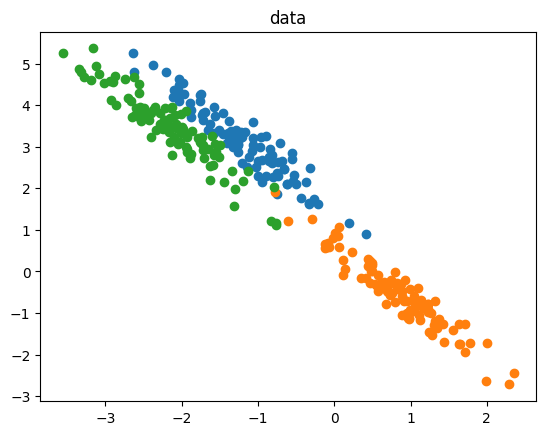

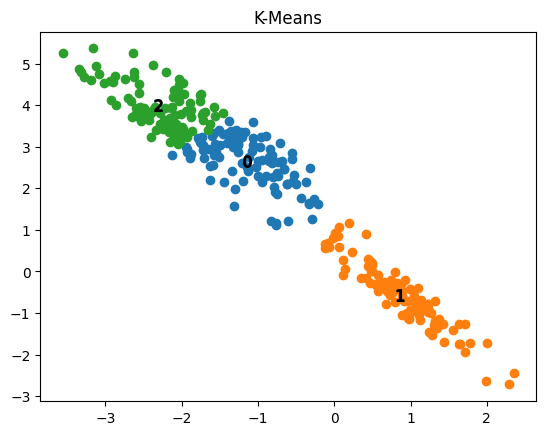

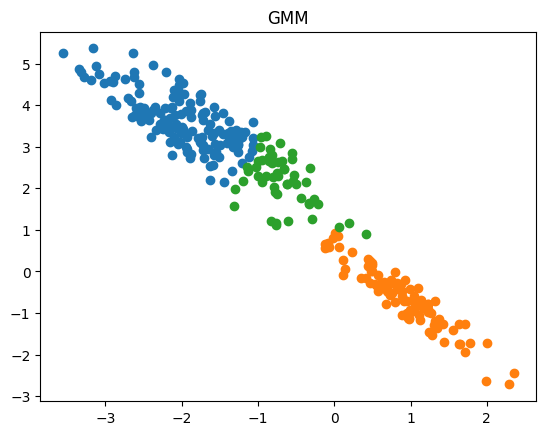

In [10]:

"""
3. GMM 클러스터링을 수행하여
   클러스터링 결과를 데이터 프레임 내에 
   저장하는 함수를 완성합니다.
   
   Step01. 데이터 X_aniso에 대한 
           GMM 클러스터링을 수행합니다.
           
           군집의 개수는 3개, 
           random_state는 0으로 설정합니다.
           
   Step02. gmm_label 변수에
           클러스터링 결과를 저장합니다.
            
"""
def GMM():
    
    gmm = GaussianMixture(n_components=3, random_state=0)
    
    gmm_label = gmm.fit_predict(X_aniso)

    clusterDF['gmm_label']=gmm_label
    
    unique_labels = np.unique(gmm_label)
    
    # GMM 군집 결과를 시각화합니다.
    fig, ax = plt.subplots()
    plt.title('GMM')
    
    for label in unique_labels:
        label_cluster = clusterDF[clusterDF['gmm_label'] == label]
        plt.scatter(x = label_cluster['ftr1'], y = label_cluster['ftr2'])
    
    
    print("Gaussian Mixture Model")
    print(clusterDF.groupby('target')['gmm_label'].value_counts())
    
    return gmm_label

def main():
    data_visualize()
    K_means()
    GMM()

if __name__ == "__main__":
    main()
